# GERMANY

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import hashlib
import importlib
import Functions
importlib.reload(Functions)
import plotly
import plotly.express as px
import nbformat

olympics = pd.read_csv('athlete_events.csv')
noc = pd.read_csv('noc_regions.csv')

## Uppgift 1 - Landstatistik

In [57]:
germany, germany_all = Functions.hashed_names(olympics)
germany = germany.reset_index(drop = True)
germany.head(5)

,ID,Hash_Names,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,133,341116996c59575b8e0a66ad3d42f5063c72c9d5fd8840...,M,NaN,NaN,NaN,Germany,GER,1900 Summer,1900,Summer,Paris,Gymnastics,Gymnastics Men's Individual All-Around,NaN
1,389,0740975bf9235edebcecc325eeff6e611f13de55abfc11...,M,45.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Designs F...",NaN
2,389,0740975bf9235edebcecc325eeff6e611f13de55abfc11...,M,45.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Architect...",NaN
3,396,1acabc3b523678f8cd7b07dd38a5a0808f8d799b0a52c0...,F,25.0,165.0,55.0,Germany,GER,2008 Summer,2008,Summer,Beijing,Gymnastics,Gymnastics Women's Individual All-Around,NaN
4,396,1acabc3b523678f8cd7b07dd38a5a0808f8d799b0a52c0...,F,25.0,165.0,55.0,Germany,GER,2008 Summer,2008,Summer,Beijing,Gymnastics,Gymnastics Women's Team All-Around,NaN


### De sporter tyskland fått mest medaljer i

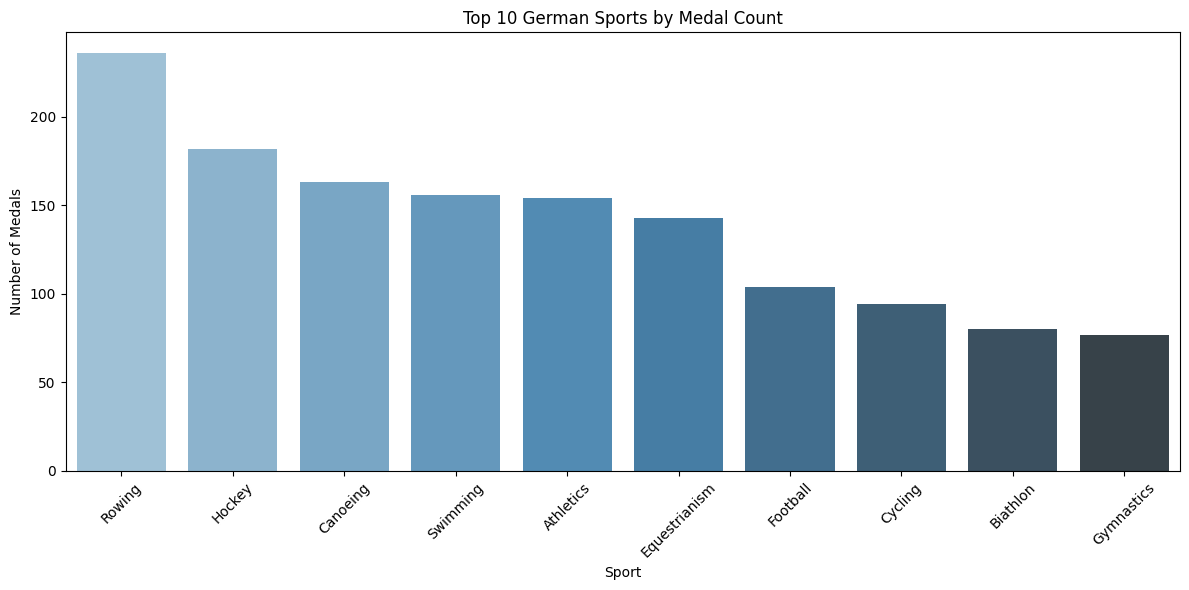

In [58]:
top10ports = Functions.top_german_sports(germany_df = germany, top_n = 10)

### Antal medaljer per OS

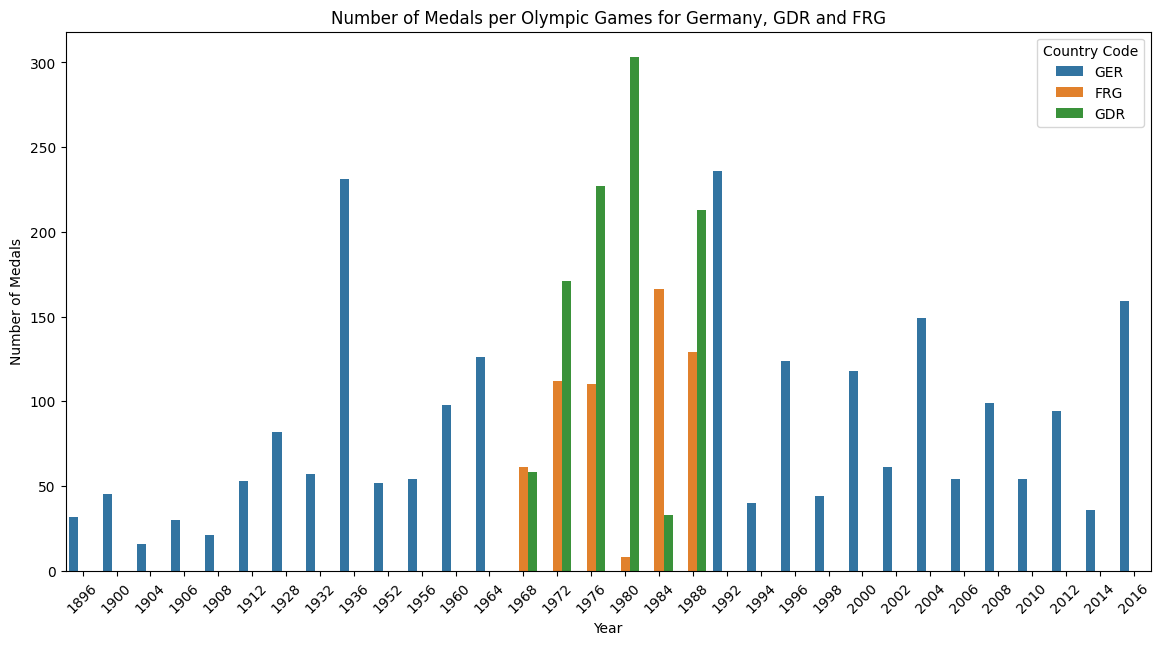

In [59]:
Functions.medals_each_year(olympics, ["GER", "GDR", "FRG"], "Number of Medals per Olympic Games for Germany, GDR and FRG")

### Histogram över åldrar

### Väst och Öst-Tyskland

In [62]:
east_germany = germany_all[germany_all['NOC'] == 'GDR'].copy()
west_germany = germany_all[germany_all['NOC'] == 'FRG'].copy()

Text(0.5, 1.0, 'Sex distribution - East Germany (GDR)')

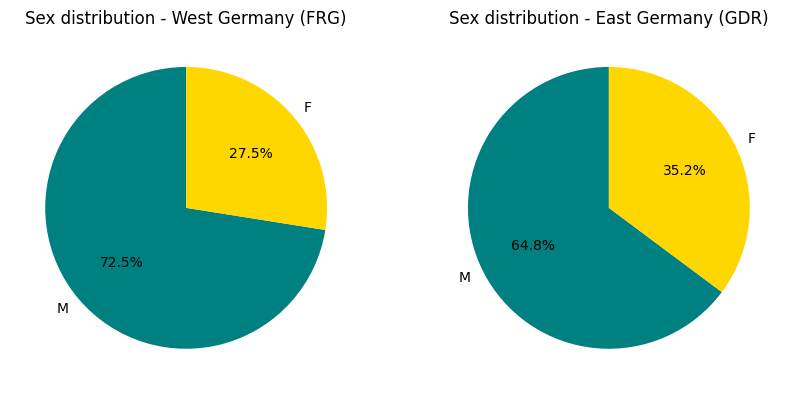

In [63]:
east_sex = east_germany['Sex'].value_counts()
west_sex = west_germany['Sex'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].pie(west_sex, labels = west_sex.index, autopct='%1.1f%%', startangle=90, colors = ['Teal', 'Gold'])
axes[0].set_title('Sex distribution - West Germany (FRG)')
axes[1].pie(east_sex, labels = east_sex.index, autopct='%1.1f%%', startangle=90, colors = ['Teal', 'Gold'])
axes[1].set_title('Sex distribution - East Germany (GDR)')

In [64]:
participants = germany_all.groupby(["Year", "NOC", "Season"])["Hash_Names"].nunique().reset_index(name='Participants')

fig = px.line(participants,
              x = 'Year', 
              y = 'Participants', 
              color = 'NOC', 
              line_dash='Season',
              title='Participants over the years')

fig.update_layout(
    title={'text' : 'German participants through the years','x':0.5,'xanchor':'center'},
    xaxis_title='År', yaxis_title='Antal deltagare', legend_title='Nation'
)

### Jämförelse mellan antal medaljer under sommar och vinter

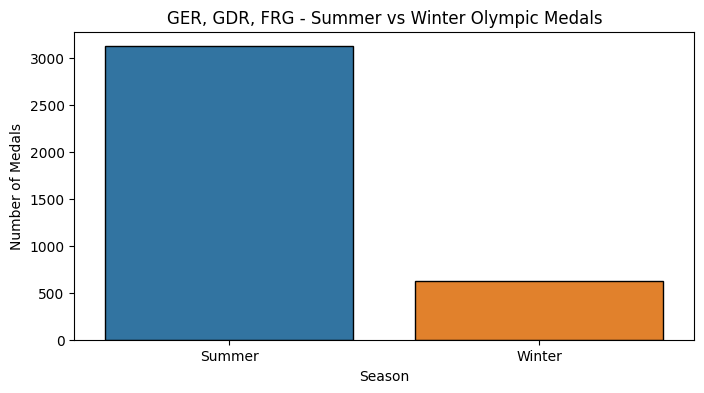

In [65]:
Functions.plot_summer_vs_winter(olympics)

## Uppgift 2 - Sportstatistik

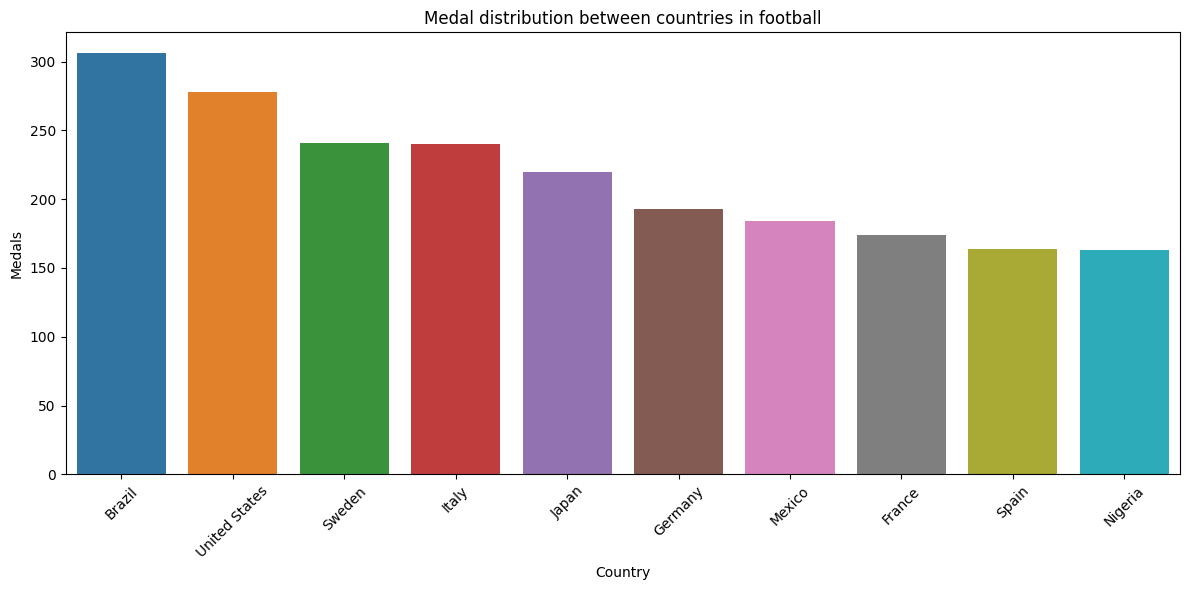

In [67]:
football = olympics[olympics['Sport'] == 'Football'].copy()
football_medals = football[football['Team'].notna()].copy()

medals_by_country = football_medals["Team"].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=medals_by_country.index, y=medals_by_country.values, palette='tab10', hue=medals_by_country.index, legend=False)
plt.title("Medal distribution between countries in football")
plt.ylabel("Medals")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

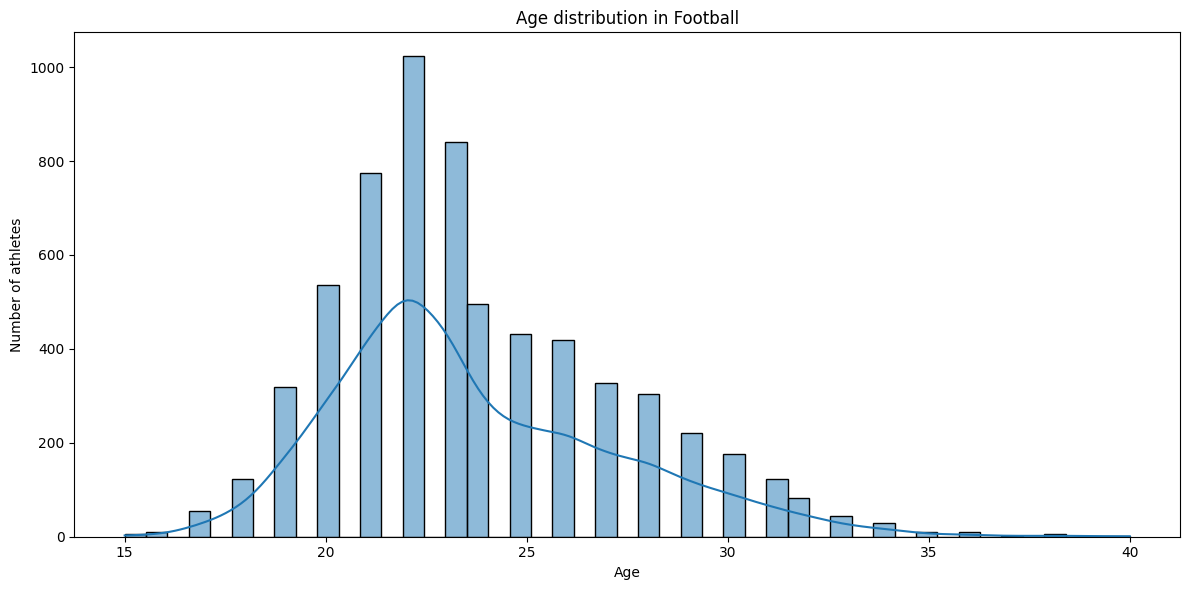

In [68]:
plt.figure(figsize=(12,6))
sns.histplot(data=football, x='Age', kde=True)
plt.title("Age distribution in Football")
plt.xlabel('Age')
plt.ylabel('Number of athletes')
plt.tight_layout()
plt.show()

### Medaljfördelning baserat på längd och vikt.

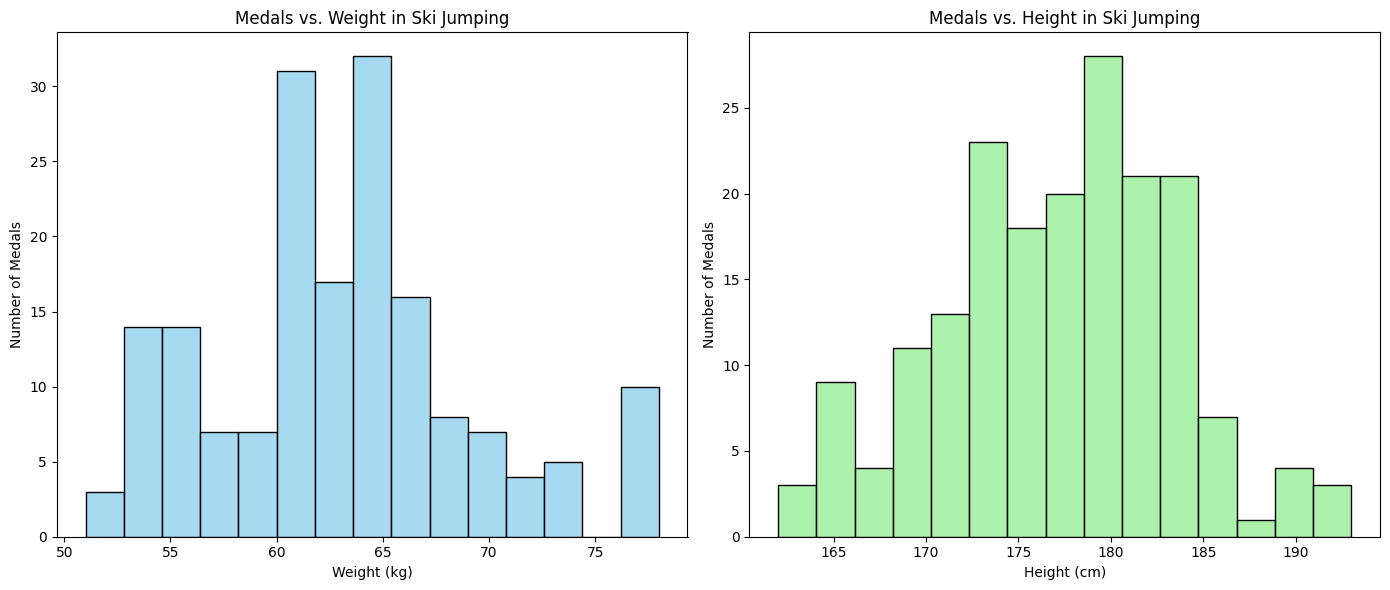

In [69]:
Functions.medal_distribution_weight_height(olympics, sport = "Ski Jumping")